# SARSA on Grid World
This notebook shows how to apply the SARSA (State Action Reward State Action) algoritm to the gridworld problem

In [1]:
# Set relative path to parent directory
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [2]:
# Import and set up environment
from environments.gridWorld import gridWorld
env = gridWorld('../environments/gridworlds/tiny.json')

## The SARSA algorithm
The SARSA algorithem is based on the Temporal-Difference learning update rule only applied to state action pairs. This gives the following on polecy update rule:
$$
    Q(s, a) \gets Q(s, a)  + \alpha \big{[} R(s', s, a) + \gamma Q(s', a') - Q(s, a) \big{]}
$$
where :
- $s$ and $s'$ are states, where $s'$ is the state we land in after taking action $a$ in state $s$
- $a$ and $a'$ are the actions taken in state $s$ and $s'$ respectively
- $\alpha$ is the learning rate
- $\gamma$ is the discounting rate
- $Q(s, a)$ is the value (expected discounted reward) of taking action $a$ in state $s$

In [3]:
from matplotlib import pyplot as plt
import numpy as np


# Initialize Q values
q_default = 0

def choose_action(env, Q, s, epsilon = 0.9):
    # Select action (epsilon greedy)
    if env.actions() == []:
        return 'U'
    if np.random.rand() < epsilon:
        a = env.actions()[np.argmax([Q.get((*s, action), q_default) for action in env.actions()])]
    else:
        a = np.random.choice(env.actions())
    return a

def sarsa(env, gamma, alpha, Q = dict()):
    # Initialize environment
    s = env.init()
    
    # Select initial action
    a = choose_action(env, Q, s)
    
    
    while(env.terminal[s] == 0):
        # Perform action and observe reward
        env.step(a)
        r = env.reward()
        s_next = env.state()
        
        # Selct next action
        a_next = choose_action(env, Q, s_next)
        
        # Q update
        Q[(*s, a)] = (1-alpha)*Q.get((*s, a), q_default) + alpha*(r +  gamma*Q.get((*s_next, a_next), q_default))
        
        a = a_next
        s = s_next
    return Q

In [4]:
import numpy as np

Q = dict()
NUM_EPISODES = 10000
for e in range(NUM_EPISODES):
    alpha = 1 - 0.98*e/NUM_EPISODES #Decaying learning rate
    Q = sarsa(env , gamma = 1.0 , alpha = alpha, Q = Q)
    if e%(NUM_EPISODES//10) == 0:
        print("Episode: {}, Alpha: {:1.4f}, Q size: {}".format(e, alpha, len(Q)))

Episode: 0, Alpha: 1.0000, Q size: 29
Episode: 1000, Alpha: 0.9020, Q size: 40
Episode: 2000, Alpha: 0.8040, Q size: 40
Episode: 3000, Alpha: 0.7060, Q size: 40
Episode: 4000, Alpha: 0.6080, Q size: 40
Episode: 5000, Alpha: 0.5100, Q size: 40
Episode: 6000, Alpha: 0.4120, Q size: 40
Episode: 7000, Alpha: 0.3140, Q size: 40
Episode: 8000, Alpha: 0.2160, Q size: 40
Episode: 9000, Alpha: 0.1180, Q size: 40


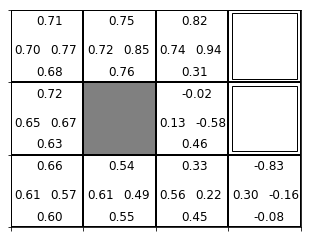

In [5]:
from matplotlib import pyplot as plt

pos = {"U": (-0.15, -0.3), "D": (-0.15, 0.4), "L": (-0.45, 0.1), "R": (0.05, 0.1)}

def show_action_value_function(Q, plot_all = True):
    fig = env.render(show = False, show_state = False, show_reward = False)            
    for s in env.states():
        if plot_all:
            for i, a in enumerate(env.actions(s)):
                fig.axes[0].annotate("{0:.2f}".format(Q[(*s, a)]), (s[1] + pos[a][0], s[0] + pos[a][1]), size = 12)
        else: 
            lst = [Q[(*s, a)] for a in env.actions(s)]
            if lst:
                fig.axes[0].annotate("{0:.3f}".format(max(lst)), (s[1] - 0.1, s[0] + 0.1), size = 12)
    plt.show()

show_action_value_function(Q, plot_all= True)

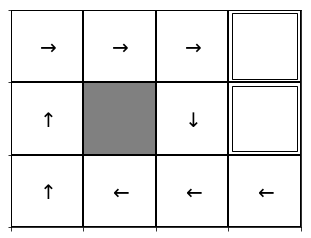

In [6]:
from matplotlib import pyplot as plt

def show_action_value_policy(Q):
    fig = env.render(show = False, show_state = False, show_reward = False)
    action_map = {"U": "↑", "D": "↓", "L": "←", "R": "→"}
    for s in env.states():
        lst = [Q[(*s, a)] for a in env.actions(s)]
        if lst:
            fig.axes[0].annotate(action_map[env.actions(s)[np.argmax(lst)]], (s[1] - 0.1, s[0] + 0.1), size = 20)
    plt.show()
    
show_action_value_policy(Q)